In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models


# def make_dot(var):
#     node_attr = dict(style='filled',
#                      shape='box',
#                      align='left',
#                      fontsize='12',
#                      ranksep='0.1',
#                      height='0.2')
#     dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
#     seen = set()

#     def add_nodes(var):
#         if var not in seen:
#             if isinstance(var, Variable):
#                 value = '('+(', ').join(['%d'% v for v in var.size()])+')'
#                 dot.node(str(id(var)), str(value), fillcolor='lightblue')
#             else:
#                 dot.node(str(id(var)), str(type(var).__name__))
#             seen.add(var)
#             if hasattr(var, 'previous_functions'):
#                 for u in var.previous_functions:
#                     dot.edge(str(id(u[0])), str(id(var)))
#                     add_nodes(u[0])
#     add_nodes(var.creator)
#     return dot


# inputs = torch.randn(1,3,224,224)
# resnet18 = models.resnet18()
# y = resnet18(Variable(inputs))
# print(y)

# g = make_dot(y)
# g

In [3]:
!pip install torchviz

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [5]:
import torch
from torchviz import make_dot

x=torch.ones(10, requires_grad=True)
weights = {'x':x}

y=x**2
z=x**3
r=(y+z).sum()

d = make_dot(r)#.render("attached")

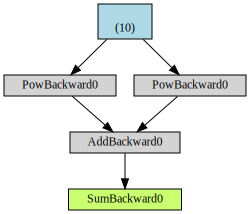

In [6]:
d

In [9]:
#IMPORTS
from tqdm.notebook import tqdm

import torch
import torchvision
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import requests
from PIL import Image
import os
import io
import base64

from matplotlib.pyplot import imshow

In [10]:
import sys
sys.path.append(os.path.abspath("../../skin_cancer_nas")) # go to parent dir
sys.path.append(os.path.abspath("/mnt/skin_cancer_nas/data"))
sys.path.append(os.path.abspath("/mnt/skin_cancer_nas/data/torch_generator"))
sys.path.append(os.path.abspath("/mnt/skin_cancer_nas/nas/darts_torch"))

sys.path.append('/mnt')
sys.path.append('/mnt/skin_cancer_nas')
sys.path.append('/mnt/skin_cancer_nas/data/torch_generator')
from skin_cancer_nas.data.torch_generator import generator as data_gen
from skin_cancer_nas.data.torch_generator import base_classes
from skin_cancer_nas.data.torch_generator.config import *

from nas.darts_torch import *
import cv2

In [18]:
# Load model
device = 'cpu'

model = torch.load("/mnt/models/darts_retrained/6ch_128x128_no_metainfo_registered_5Fold_newC43-5f/XV2_SGD_orig_02DropChannel_1lrs_2oct_newC43NoDup_ClassSet4_ManCorected_registered_350epochs_fold-4/final_model1.pt")
model.to(device)
for param in model.parameters():
    param.requires_grad = False

In [14]:
model

CNN(
  (stem): Sequential(
    (0): Conv2d(6, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cells): ModuleList(
    (0): Cell(
      (preproc0): StdConv(
        (net): Sequential(
          (0): ReLU()
          (1): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
      (preproc1): StdConv(
        (net): Sequential(
          (0): ReLU()
          (1): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
        )
      )
      (mutable_ops): ModuleList(
        (0): Node(
          (ops): ModuleList(
            (0): SepConv(
              (net): Sequential(
                (0): DilConv(
                  (net): Sequential(
               

In [15]:
!pip install hiddenlayer

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
import torch
import torchvision.models
import hiddenlayer as hl

## NB! NB! NB! All our networks are the same, the difference is only between number of layers!

# 1 Layer network visualization

In [45]:
# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
g = hl.build_graph(model, torch.zeros([1, 6, 128, 128]))

/usr/local/lib/python3.6/dist-packages/nni/nas/pytorch/mutator.py:232: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask = torch.tensor(mask)  # pylint: disable=not-callable


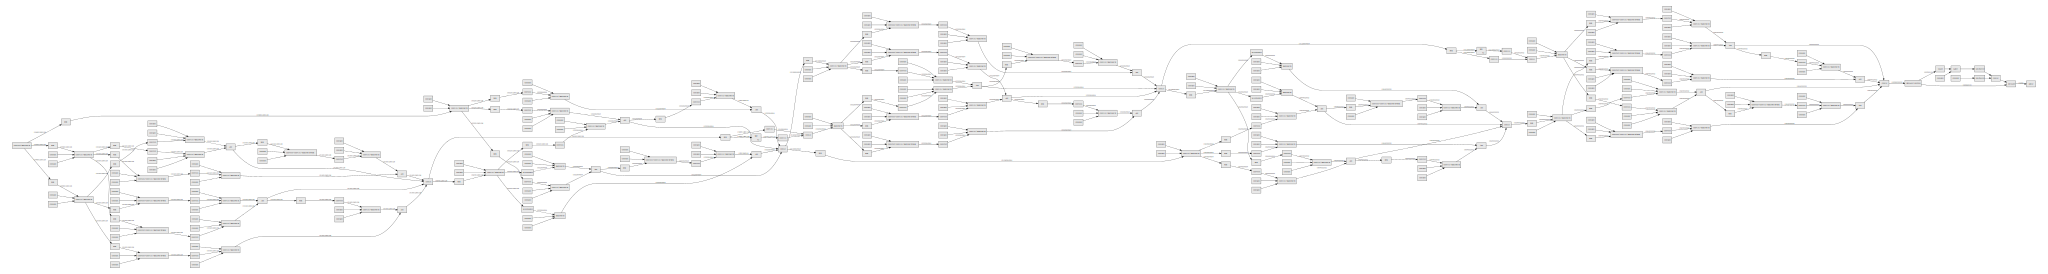

In [46]:
g

In [29]:
g.save('/mnt/notebooks/4_DARTS/1_layer.pdf')

In [52]:
def build_dot(g):
    """Generate a GraphViz Dot graph.
    Returns a GraphViz Digraph object.
    """
    from graphviz import Digraph

    # Build GraphViz Digraph
    dot = Digraph()
    dot.attr("graph", 
             bgcolor=g.theme["background_color"],
             color=g.theme["outline_color"],
             fontsize=g.theme["font_size"],
             fontcolor=g.theme["font_color"],
             fontname=g.theme["font_name"],
             margin=g.theme["margin"],
             rankdir="TB",
             pad=g.theme["padding"])
    dot.attr("node", shape="box", 
             style="filled", margin="0,0",
             fillcolor=g.theme["fill_color"],
             color=g.theme["outline_color"],
             fontsize=g.theme["font_size"],
             fontcolor=g.theme["font_color"],
             fontname=g.theme["font_name"])
    dot.attr("edge", style="solid", 
             color=g.theme["outline_color"],
             fontsize=g.theme["font_size"],
             fontcolor=g.theme["font_color"],
             fontname=g.theme["font_name"])

    for k, n in g.nodes.items():
        label = "<tr><td cellpadding='6'>{}</td></tr>".format(n.title)
        if n.caption:
            label += "<tr><td>{}</td></tr>".format(n.caption)
        if n.repeat > 1:
            label += "<tr><td align='right' cellpadding='2'>x{}</td></tr>".format(n.repeat)
        label = "<<table border='0' cellborder='0' cellpadding='0'>" + label + "</table>>"
        dot.node(str(k), label)
    for a, b, label in g.edges:
        if isinstance(label, (list, tuple)):
            label = "x".join([str(l or "?") for l in label])

        dot.edge(str(a), str(b), label)
    return dot


In [53]:
d = build_dot(g)

In [54]:
def save(dot, path, format="pdf"):
    # TODO: assert on acceptable format values
#     dot = self.build_dot()
    dot.format = format
    directory, file_name = os.path.split(path)
    # Remove extension from file name. dot.render() adds it.
    file_name = file_name.replace("." + format, "")
    dot.render(file_name, directory=directory, cleanup=True)

In [55]:
save(d, '/mnt/notebooks/4_DARTS/1_layer_2.pdf')

In [30]:
# g_dot = g.build_dot()

In [38]:
# g_dot.__dict__

# 2 Layer network visualization

In [41]:
# Load model
device = 'cpu'

model = torch.load("/mnt/models/darts_retrained/6ch_128x128_no_metainfo_registered_5Fold_newC43-5f/XV2_SGD_orig_02DropChannel_2lrs_2oct_newC43NoDup_ClassSet4_ManCorected_registered_350epochs_fold-4/final_model1.pt")
model.to(device)
for param in model.parameters():
    param.requires_grad = False
    
# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
g = hl.build_graph(model, torch.zeros([1, 6, 128, 128]))
g.save('/mnt/notebooks/4_DARTS/2_layers.pdf')

# 3 Layer network visualization

In [42]:
# Load model
device = 'cpu'

model = torch.load("/mnt/models/darts_retrained/6ch_128x128_no_metainfo_registered_5Fold_newC43-5f/XV2_SGD_orig_02DropChannel_3lrs_2oct_newC43NoDup_ClassSet4_ManCorected_registered_350epochs_fold-4/final_model1.pt")
model.to(device)
for param in model.parameters():
    param.requires_grad = False
    
# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
g = hl.build_graph(model, torch.zeros([1, 6, 128, 128]))
g.save('/mnt/notebooks/4_DARTS/3_layers.pdf')

/usr/local/lib/python3.6/dist-packages/nni/nas/pytorch/mutator.py:232: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask = torch.tensor(mask)  # pylint: disable=not-callable


# 4 Layer network visualization

In [43]:
# Load model
device = 'cpu'

model = torch.load("/mnt/models/darts_retrained/6ch_128x128_no_metainfo_registered_5Fold_newC43-5f/XV2_SGD_orig_02DropChannel_4lrs_2oct_newC43NoDup_ClassSet4_ManCorected_registered_350epochs_fold-4/final_model1.pt")
model.to(device)
for param in model.parameters():
    param.requires_grad = False
    
# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
g = hl.build_graph(model, torch.zeros([1, 6, 128, 128]))
g.save('/mnt/notebooks/4_DARTS/4_layers.pdf')

/usr/local/lib/python3.6/dist-packages/nni/nas/pytorch/mutator.py:232: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask = torch.tensor(mask)  # pylint: disable=not-callable


# 5 Layer network visualization

In [44]:
# Load model
device = 'cpu'

model = torch.load("/mnt/models/darts_retrained/6ch_128x128_no_metainfo_registered_5Fold_newC43-5f/XV2_SGD_orig_02DropChannel_5lrs_2oct_newC43NoDup_ClassSet4_ManCorected_registered_350epochs_fold-4/final_model1.pt")
model.to(device)
for param in model.parameters():
    param.requires_grad = False
    
# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
g = hl.build_graph(model, torch.zeros([1, 6, 128, 128]))
g.save('/mnt/notebooks/4_DARTS/5_layers.pdf')

/usr/local/lib/python3.6/dist-packages/nni/nas/pytorch/mutator.py:232: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask = torch.tensor(mask)  # pylint: disable=not-callable
